<>:22: SyntaxWarning: invalid escape sequence '\l'
<>:22: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_6008/3977345899.py:22: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$\lambda$, $\mu$m')


<Table length=283>
   _RAJ2000       _DEJ2000    ... sed_eflux sed_filter
     deg            deg       ...     Jy              
   float64        float64     ...  float32    str32   
-------------- -------------- ... --------- ----------
 64.4511443919  24.7296843411 ...        --  Johnson:V
 64.4511443919  24.7296843411 ...     0.016     HIP:VT
 64.4511443919  24.7296843411 ...      0.01     HIP:BT
 64.4512734568  24.7299885364 ...     0.005   2MASS:Ks
 64.4512734568  24.7299885364 ...     0.012    2MASS:H
 64.4512734568  24.7299885364 ...     0.009    2MASS:J
           ...            ... ...       ...        ...
 64.4512772000  24.7299858000 ...     0.007  Johnson:J
 64.4512772000  24.7299858000 ...     0.012     HIP:VT
 64.4512772000  24.7299858000 ...    0.0078     HIP:BT
 64.4512925000  24.7299925000 ...        --  Johnson:V
 64.4512925000  24.7299925000 ...        --  Johnson:B
 64.4513074501  24.7299815360 ...         0     Gaia:G


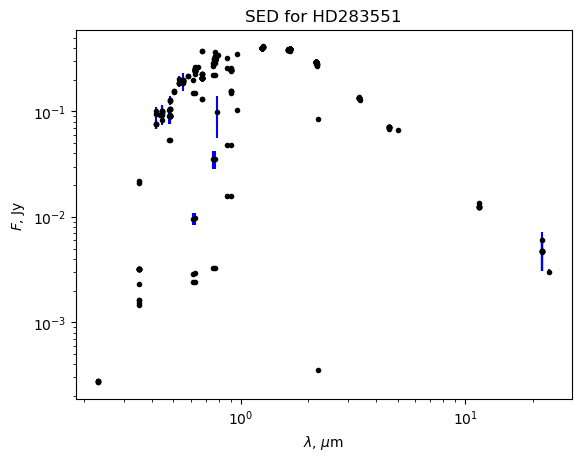

In [8]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pprint
import copy

radius=5
target='HD283551'
sed=Table.read(f"https://vizier.cds.unistra.fr/viz-bin/sed?-c={target}&-c.rs={radius}")
pp=pprint.PrettyPrinter(depth=20)
pp.pprint(sed)

x=299792.458/sed["sed_freq"]

x_copy=copy.deepcopy(x)
y_copy=copy.deepcopy(sed["sed_flux"])
filter_copy=copy.deepcopy(sed["sed_filter"])
error_copy=copy.deepcopy(sed["sed_eflux"])


fig, ax = plt.subplots()
ax.set_xlabel('$\lambda$, $\mu$m')
ax.set_ylabel('$F$, Jy')
ax.set_xscale('log')
ax.set_yscale('log')
ax.errorbar(x, sed["sed_flux"], yerr=sed["sed_eflux"], fmt='.', color='black', ecolor='b')
plt.title('SED for'+' '+target)
plt.savefig('sed_nofill.png',dpi=300)
plt.show()
plt.close()

<>:46: SyntaxWarning: invalid escape sequence '\l'
<>:46: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_6008/1615224138.py:46: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$\lambda$, $\mu$m')


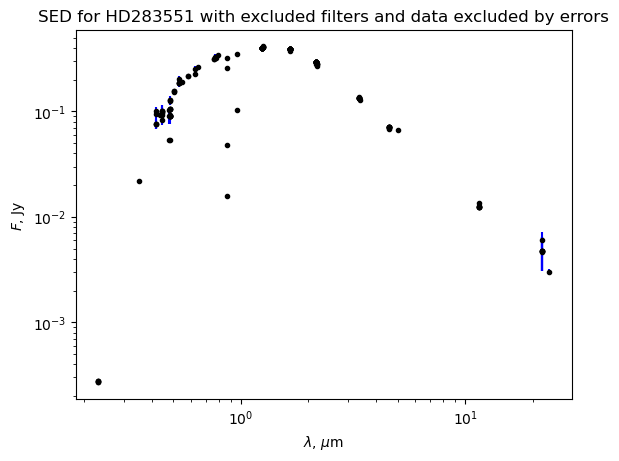

In [13]:
filters_to_exclude = ['Gaia:G','SDSS:i' ,'SDSS:r' ,'SDSS:r', 'UKIDSS:K', 'PAN-STARRS/PS1:i',
 'PAN-STARRS/PS1:r' ,'PAN-STARRS/PS1:r','SDSS:r', 'SDSS:z', 'Johnson:H' ,'PAN-STARRS/PS1:i', 'SDSS:u' ,'SDSS:r',
 'SDSS:r' ,'SDSS:r', 'Gaia:G'
    
]

column_values = sed['sed_eflux']
non_zero_values = column_values[column_values != 0.0]

min_non_zero = np.min(non_zero_values)


def filter_by_name(group_table, filters_to_exclude):
    
    
    for row in group_table:
        if row['sed_filter'] in filters_to_exclude:
            return False  
    
    return True  

def filter_error(group_table):
    for row in group_table:
        if row['sed_eflux']=='--' or row['sed_eflux']>5000*min_non_zero:
            return False  
    
    return True  



    
grouped_table = sed.group_by('sed_filter')


filtered_groups = [group for group in grouped_table.groups if filter_by_name(group,filters_to_exclude) and filter_error(group)]


filtered_table = Table(rows=[row for group in filtered_groups for row in group])




filtered_table['col6']=299792.458/filtered_table['col6']

fig, ax = plt.subplots()
ax.set_xlabel('$\lambda$, $\mu$m')
ax.set_ylabel('$F$, Jy')
ax.set_xscale('log')
ax.set_yscale('log')
ax.errorbar(filtered_table['col6'],filtered_table['col7'], yerr=filtered_table['col8'], fmt='.', color='black', ecolor='b')
plt.title('SED for'+' '+target+' '+'with excluded filters and data excluded by errors')
plt.savefig('sed_nof.png',dpi=300)
plt.show()
plt.close()

<>:68: SyntaxWarning: invalid escape sequence '\l'
<>:115: SyntaxWarning: invalid escape sequence '\l'
<>:162: SyntaxWarning: invalid escape sequence '\l'
<>:192: SyntaxWarning: invalid escape sequence '\l'
<>:68: SyntaxWarning: invalid escape sequence '\l'
<>:115: SyntaxWarning: invalid escape sequence '\l'
<>:162: SyntaxWarning: invalid escape sequence '\l'
<>:192: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_6008/3690821595.py:68: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$\lambda$, $\mu$m')
/tmp/ipykernel_6008/3690821595.py:115: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$\lambda$, $\mu$m')
/tmp/ipykernel_6008/3690821595.py:162: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$\lambda$, $\mu$m')
/tmp/ipykernel_6008/3690821595.py:192: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$\lambda$, $\mu$m')
/tmp/ipykernel_6008/3690821595.py:29: FutureWarning: elementwise comparison failed; returning scalar instea

[]


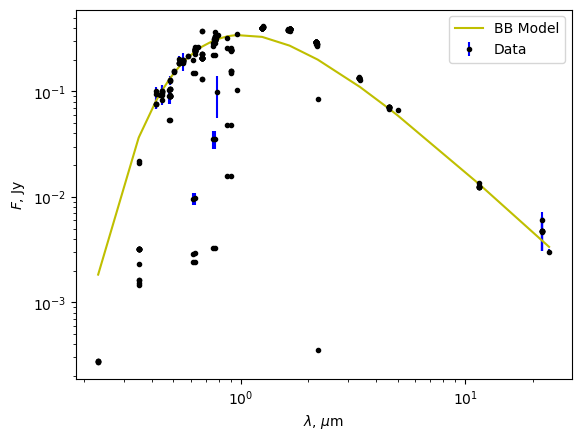

/tmp/ipykernel_6008/3690821595.py:83: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  filtered_err[filtered_err== '--'] = 0


['SDSS:i' 'SDSS:r' 'SDSS:r' 'UKIDSS:K' 'PAN-STARRS/PS1:i'
 'PAN-STARRS/PS1:r' 'PAN-STARRS/PS1:r']


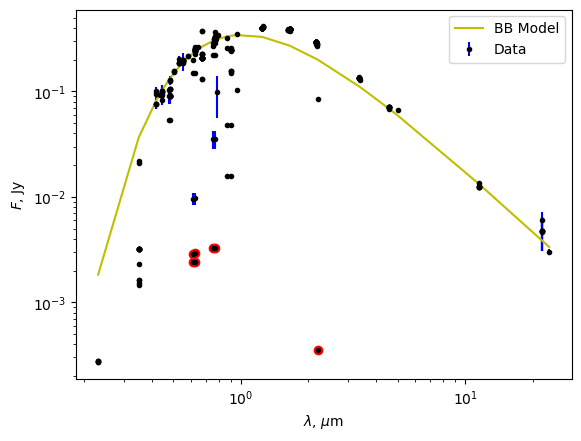

/tmp/ipykernel_6008/3690821595.py:128: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  f_err[f_err== '--'] = 0


['SDSS:r' 'SDSS:z' 'Johnson:H' 'PAN-STARRS/PS1:i' 'SDSS:u' 'SDSS:r'
 'SDSS:r' 'SDSS:r' 'Gaia:G']


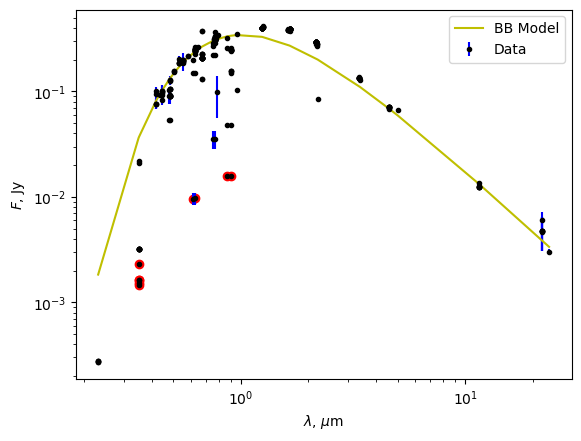

/tmp/ipykernel_6008/3690821595.py:174: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  fi_err[fi_err== '--'] = 0


4069.6428278514413 9.566551565074632e-20


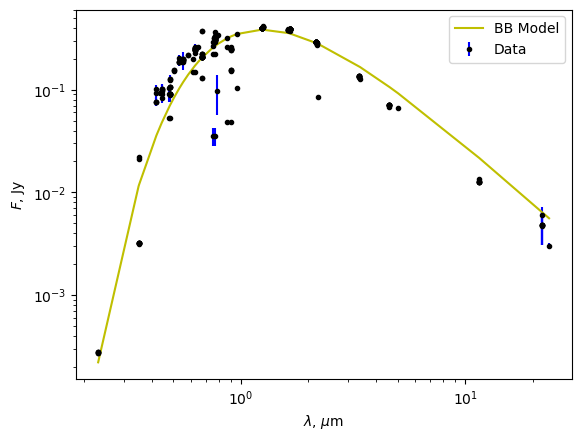

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling.physical_models import BlackBody
from astropy.modeling import fitting
from astropy import units as u
from astropy.modeling import models
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from scipy.optimize import curve_fit
import copy
from scipy import stats


def planck(lam, T, omega):
    b = models.BlackBody(temperature=T*u.K)
    res =(b(lam * u.um)).to(u.Jy/u.sr) * np.pi*omega
    return res.value



x = np.array(x_copy)#np.array(x)#filtered_freq)#sed['sed_freq']
y = np.array(y_copy)#np.array(sed["sed_flux"])#filtered_flux)#sed['sed_flux']
filter=np.array(filter_copy)#np.array(sed["sed_filter"])#sed['sed_filter']



error=np.array(error_copy)#np.array(sed["sed_eflux"])
error[error== '--'] = 0
error= np.nan_to_num(error, nan=0)
weights = [1/max(_,0.001) for _ in error]




popt, pcov = curve_fit(planck, x, y, p0=(20000, 1e-20), bounds=([5000, 1e-29], [50000,1e-15]),absolute_sigma=True,sigma = weights,method='trf')
w = np.sort(x)
bb_fit = planck(w, popt[0],popt[1])


bb_fitx=planck(x,  popt[0],popt[1])

ff_x = copy.deepcopy(x)
ff_y = copy.deepcopy(y)
ff_e=copy.deepcopy(error)

diff=ff_y#np.log(ff_y)-np.log(bb_fitx)
z_scores = np.abs(stats.zscore(diff))
threshold = 3

idx = np.where(z_scores > threshold)[0]


outliers = ff_y[idx]
out_x=ff_x[idx]

filter1=filter[idx]

print(filter1)


fig, ax = plt.subplots(1, 1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.errorbar(x, y, yerr=error, fmt='.', color='black', ecolor='b', label='Data')
ax.plot(w, bb_fit, color='y', label='BB Model')
ax.scatter(out_x,outliers,c='r')
ax.set_xlabel('$\lambda$, $\mu$m')
ax.set_ylabel('$F$, Jy')
plt.legend()
plt.savefig('sed_fill_outliers1.png',dpi=300)
plt.show()
plt.close()




filtered_ff_y = np.delete(ff_y, idx)
filtered_ff_x = np.delete(ff_x, idx)
filtered_err=np.delete(ff_e,idx)

filtered_err=np.array(filtered_err)
filtered_err[filtered_err== '--'] = 0
filtered_err= np.nan_to_num(filtered_err, nan=0)
weights = [1/max(_,0.001) for _ in filtered_err]


popt, pcov = curve_fit(planck, filtered_ff_x, filtered_ff_y, p0=(8000, 1e-20), bounds=([5000, 1e-29], [40000,1e-15]),absolute_sigma=True,sigma=weights,method='trf')
w = np.sort(filtered_ff_x)
bb_fit = planck(w, popt[0],popt[1])
bb_fitx=planck(filtered_ff_x,  popt[0],popt[1])



diff=np.log(filtered_ff_y)-np.log(bb_fitx)
z_scores = np.abs(stats.zscore(diff))
threshold = 3

idx = np.where(z_scores > threshold)[0]


outliers = filtered_ff_y[idx]
out_x=filtered_ff_x[idx]

filter2=filter[idx]

print(filter2)

fig, ax = plt.subplots(1, 1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.errorbar(filtered_ff_x, filtered_ff_y, yerr=filtered_err, fmt='.', color='black', ecolor='b', label='Data')
ax.plot(w, bb_fit, color='y', label='BB Model')
ax.scatter(out_x,outliers,c='r')
ax.set_xlabel('$\lambda$, $\mu$m')
ax.set_ylabel('$F$, Jy')
plt.legend()
plt.savefig('sed_fill_outliers2.png',dpi=300)
plt.show()
plt.close()



f_ff_y = np.delete(filtered_ff_y, idx)
f_ff_x = np.delete(filtered_ff_x, idx)
f_err=np.delete(filtered_err,idx)
f_err=np.array(f_err)
f_err[f_err== '--'] = 0
f_err= np.nan_to_num(f_err, nan=0)
weights = [1/max(_,0.001) for _ in f_err]




popt, pcov = curve_fit(planck, f_ff_x, f_ff_y, p0=(8000, 1e-20), bounds=([5000, 1e-29], [50000,1e-15]),absolute_sigma=True,sigma=weights,method='trf')
w = np.sort(f_ff_x)
bb_fit = planck(w, popt[0],popt[1])
bb_fitx=planck(f_ff_x,  popt[0],popt[1])



diff=np.log(f_ff_y)-np.log(bb_fitx)
z_scores = np.abs(stats.zscore(diff))
threshold = 3

idx = np.where(z_scores > threshold)[0]


outliers = f_ff_y[idx]
out_x=f_ff_x[idx]
filter3=filter[idx]

print(filter3)


fig, ax = plt.subplots(1, 1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.errorbar(f_ff_x, f_ff_y, yerr=f_err, fmt='.', color='black', ecolor='b', label='Data')
ax.plot(w, bb_fit, color='y', label='BB Model')
ax.scatter(out_x,outliers,c='r')
ax.set_xlabel('$\lambda$, $\mu$m')
ax.set_ylabel('$F$, Jy')
plt.legend()
plt.savefig('sed_fill_outliers3.png',dpi=300)
plt.show()
plt.close()


fi_ff_y = np.delete(f_ff_y, idx)
fi_ff_x = np.delete(f_ff_x, idx)
fi_err=np.delete(f_err,idx)
fi_err=np.array(fi_err)
fi_err[fi_err== '--'] = 0
fi_err= np.nan_to_num(fi_err, nan=0)
weights = [1/max(_,0.001) for _ in fi_err]



popt, pcov = curve_fit(planck, fi_ff_x, fi_ff_y, p0=(8000, 1e-20), bounds=([4000, 1e-29], [50000,1e-15]),absolute_sigma=True,sigma=weights,method='trf')
w = np.sort(fi_ff_x)
bb_fit = planck(w, popt[0],popt[1])
bb_fitx=planck(fi_ff_x,  popt[0],popt[1])

print(*popt)
fig, ax = plt.subplots(1, 1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.errorbar(fi_ff_x, fi_ff_y, yerr=fi_err, fmt='.', color='black', ecolor='b', label='Data')
ax.plot(w, bb_fit, color='y', label='BB Model')
#ax.scatter(out_x,outliers,c='r')
ax.set_xlabel('$\lambda$, $\mu$m')
ax.set_ylabel('$F$, Jy')
plt.legend()
plt.savefig('sed_fill_outliers_fin.png',dpi=300)
plt.show()
plt.close()


<>:68: SyntaxWarning: invalid escape sequence '\l'
<>:115: SyntaxWarning: invalid escape sequence '\l'
<>:162: SyntaxWarning: invalid escape sequence '\l'
<>:192: SyntaxWarning: invalid escape sequence '\l'
<>:68: SyntaxWarning: invalid escape sequence '\l'
<>:115: SyntaxWarning: invalid escape sequence '\l'
<>:162: SyntaxWarning: invalid escape sequence '\l'
<>:192: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_6008/4219826284.py:68: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$\lambda$, $\mu$m')
/tmp/ipykernel_6008/4219826284.py:115: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$\lambda$, $\mu$m')
/tmp/ipykernel_6008/4219826284.py:162: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$\lambda$, $\mu$m')
/tmp/ipykernel_6008/4219826284.py:192: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$\lambda$, $\mu$m')
/tmp/ipykernel_6008/4219826284.py:29: FutureWarning: elementwise comparison failed; returning scalar instea

[]


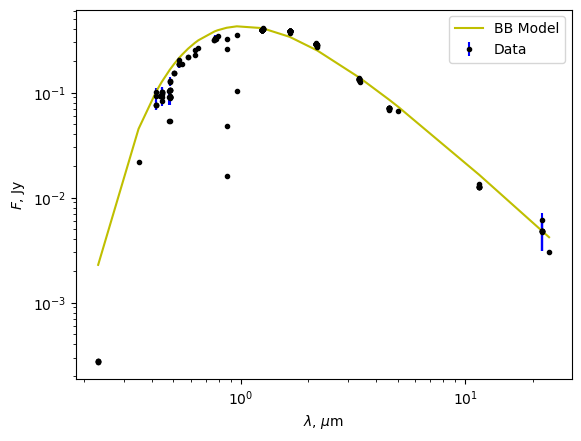

/tmp/ipykernel_6008/4219826284.py:83: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  filtered_err[filtered_err== '--'] = 0


['GALEX:NUV' 'GALEX:NUV' 'GALEX:NUV' 'GALEX:NUV' 'GALEX:NUV'
 'PAN-STARRS/PS1:z' 'PAN-STARRS/PS1:z']


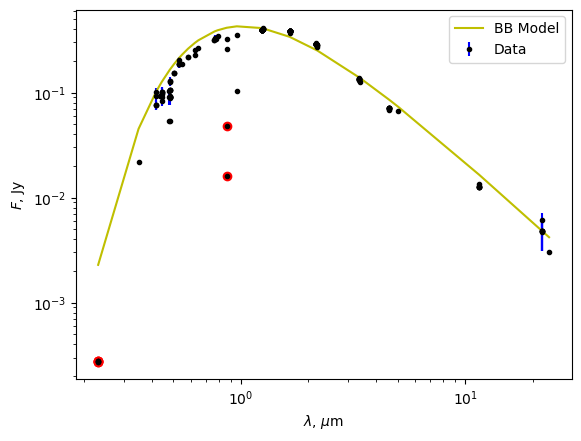

/tmp/ipykernel_6008/4219826284.py:128: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  f_err[f_err== '--'] = 0


['Johnson:K' 'Johnson:M' 'PAN-STARRS/PS1:g']


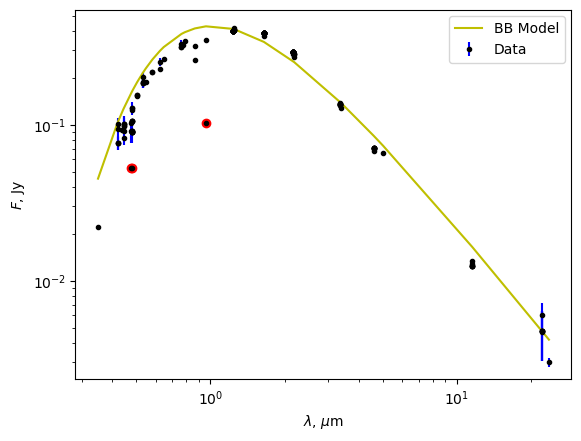

/tmp/ipykernel_6008/4219826284.py:174: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  fi_err[fi_err== '--'] = 0


4556.336519720197 7.607749282204416e-20


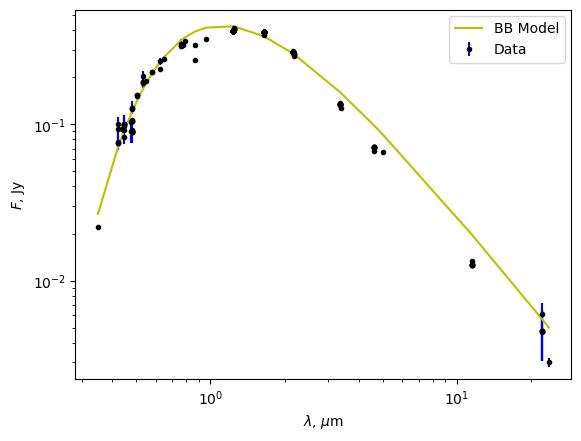

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling.physical_models import BlackBody
from astropy.modeling import fitting
from astropy import units as u
from astropy.modeling import models
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from scipy.optimize import curve_fit
import copy
from scipy import stats


def planck(lam, T, omega):
    b = models.BlackBody(temperature=T*u.K)
    res =(b(lam * u.um)).to(u.Jy/u.sr) * np.pi*omega
    return res.value



x = np.array(filtered_table['col6'])#np.array(x)#filtered_freq)#sed['sed_freq']
y = np.array(filtered_table['col7'])#np.array(sed["sed_flux"])#filtered_flux)#sed['sed_flux']
filter=np.array(filtered_table['col9'])#np.array(sed["sed_filter"])#sed['sed_filter']



error=np.array(filtered_table['col8'])#np.array(sed["sed_eflux"])
error[error== '--'] = 0
error= np.nan_to_num(error, nan=0)
weights = [1/max(_,0.001) for _ in error]




popt, pcov = curve_fit(planck, x, y, p0=(20000, 1e-20), bounds=([5000, 1e-29], [50000,1e-15]),absolute_sigma=True,sigma = weights,method='trf')
w = np.sort(x)
bb_fit = planck(w, popt[0],popt[1])


bb_fitx=planck(x,  popt[0],popt[1])

ff_x = copy.deepcopy(x)
ff_y = copy.deepcopy(y)
ff_e=copy.deepcopy(error)

diff=ff_y#np.log(ff_y)-np.log(bb_fitx)
z_scores = np.abs(stats.zscore(diff))
threshold = 3

idx = np.where(z_scores > threshold)[0]


outliers = ff_y[idx]
out_x=ff_x[idx]

filter1=filter[idx]

print(filter1)


fig, ax = plt.subplots(1, 1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.errorbar(x, y, yerr=error, fmt='.', color='black', ecolor='b', label='Data')
ax.plot(w, bb_fit, color='y', label='BB Model')
ax.scatter(out_x,outliers,c='r')
ax.set_xlabel('$\lambda$, $\mu$m')
ax.set_ylabel('$F$, Jy')
plt.legend()
plt.savefig('sed_fill_outliers1.png',dpi=300)
plt.show()
plt.close()




filtered_ff_y = np.delete(ff_y, idx)
filtered_ff_x = np.delete(ff_x, idx)
filtered_err=np.delete(ff_e,idx)

filtered_err=np.array(filtered_err)
filtered_err[filtered_err== '--'] = 0
filtered_err= np.nan_to_num(filtered_err, nan=0)
weights = [1/max(_,0.001) for _ in filtered_err]


popt, pcov = curve_fit(planck, filtered_ff_x, filtered_ff_y, p0=(8000, 1e-20), bounds=([5000, 1e-29], [40000,1e-15]),absolute_sigma=True,sigma=weights,method='trf')
w = np.sort(filtered_ff_x)
bb_fit = planck(w, popt[0],popt[1])
bb_fitx=planck(filtered_ff_x,  popt[0],popt[1])



diff=np.log(filtered_ff_y)-np.log(bb_fitx)
z_scores = np.abs(stats.zscore(diff))
threshold = 3

idx = np.where(z_scores > threshold)[0]


outliers = filtered_ff_y[idx]
out_x=filtered_ff_x[idx]

filter2=filter[idx]

print(filter2)

fig, ax = plt.subplots(1, 1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.errorbar(filtered_ff_x, filtered_ff_y, yerr=filtered_err, fmt='.', color='black', ecolor='b', label='Data')
ax.plot(w, bb_fit, color='y', label='BB Model')
ax.scatter(out_x,outliers,c='r')
ax.set_xlabel('$\lambda$, $\mu$m')
ax.set_ylabel('$F$, Jy')
plt.legend()
plt.savefig('sed_fill_outliers2.png',dpi=300)
plt.show()
plt.close()



f_ff_y = np.delete(filtered_ff_y, idx)
f_ff_x = np.delete(filtered_ff_x, idx)
f_err=np.delete(filtered_err,idx)
f_err=np.array(f_err)
f_err[f_err== '--'] = 0
f_err= np.nan_to_num(f_err, nan=0)
weights = [1/max(_,0.001) for _ in f_err]




popt, pcov = curve_fit(planck, f_ff_x, f_ff_y, p0=(8000, 1e-20), bounds=([5000, 1e-29], [50000,1e-15]),absolute_sigma=True,sigma=weights,method='trf')
w = np.sort(f_ff_x)
bb_fit = planck(w, popt[0],popt[1])
bb_fitx=planck(f_ff_x,  popt[0],popt[1])



diff=np.log(f_ff_y)-np.log(bb_fitx)
z_scores = np.abs(stats.zscore(diff))
threshold = 3

idx = np.where(z_scores > threshold)[0]


outliers = f_ff_y[idx]
out_x=f_ff_x[idx]
filter3=filter[idx]

print(filter3)


fig, ax = plt.subplots(1, 1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.errorbar(f_ff_x, f_ff_y, yerr=f_err, fmt='.', color='black', ecolor='b', label='Data')
ax.plot(w, bb_fit, color='y', label='BB Model')
ax.scatter(out_x,outliers,c='r')
ax.set_xlabel('$\lambda$, $\mu$m')
ax.set_ylabel('$F$, Jy')
plt.legend()
plt.savefig('sed_fill_outliers3.png',dpi=300)
plt.show()
plt.close()


fi_ff_y = np.delete(f_ff_y, idx)
fi_ff_x = np.delete(f_ff_x, idx)
fi_err=np.delete(f_err,idx)
fi_err=np.array(fi_err)
fi_err[fi_err== '--'] = 0
fi_err= np.nan_to_num(fi_err, nan=0)
weights = [1/max(_,0.001) for _ in fi_err]



popt, pcov = curve_fit(planck, fi_ff_x, fi_ff_y, p0=(8000, 1e-20), bounds=([4000, 1e-29], [50000,1e-15]),absolute_sigma=True,sigma=weights,method='trf')
w = np.sort(fi_ff_x)
bb_fit = planck(w, popt[0],popt[1])
bb_fitx=planck(fi_ff_x,  popt[0],popt[1])

print(*popt)
fig, ax = plt.subplots(1, 1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.errorbar(fi_ff_x, fi_ff_y, yerr=fi_err, fmt='.', color='black', ecolor='b', label='Data')
ax.plot(w, bb_fit, color='y', label='BB Model')
#ax.scatter(out_x,outliers,c='r')
ax.set_xlabel('$\lambda$, $\mu$m')
ax.set_ylabel('$F$, Jy')
plt.legend()
plt.savefig('sed_fill_outliers_fin.png',dpi=300)
plt.show()
plt.close()